In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('worldometer_coronavirus_daily_data.csv', parse_dates=['date'])

In [4]:
df.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-02-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-02-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-02-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-02-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-02-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81054 entries, 0 to 81053
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     81054 non-null  datetime64[ns]
 1   country                  81054 non-null  object        
 2   cumulative_total_cases   81054 non-null  float64       
 3   daily_new_cases          74585 non-null  float64       
 4   active_cases             80314 non-null  float64       
 5   cumulative_total_deaths  74394 non-null  float64       
 6   daily_new_deaths         63005 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 4.3+ MB


In [30]:
ind = df[df['country']=='India']
print(ind)

            date country  cumulative_total_cases  daily_new_cases  \
34434 2020-02-15   India                     3.0              NaN   
34435 2020-02-16   India                     3.0              0.0   
34436 2020-02-17   India                     3.0              0.0   
34437 2020-02-18   India                     3.0              0.0   
34438 2020-02-19   India                     3.0              0.0   
...          ...     ...                     ...              ...   
34799 2021-02-14   India              10916172.0          11434.0   
34800 2021-02-15   India              10925311.0           9139.0   
34801 2021-02-16   India              10937106.0          11795.0   
34802 2021-02-17   India              10949546.0          12440.0   
34803 2021-02-18   India              10962189.0          12643.0   

       active_cases  cumulative_total_deaths  daily_new_deaths  
34434           0.0                      0.0               NaN  
34435           0.0                      

In [7]:
ind.isnull()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
34434,False,False,False,True,False,False,True
34435,False,False,False,False,False,False,True
34436,False,False,False,False,False,False,True
34437,False,False,False,False,False,False,True
34438,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
34799,False,False,False,False,False,False,False
34800,False,False,False,False,False,False,False
34801,False,False,False,False,False,False,False
34802,False,False,False,False,False,False,False


In [31]:
ind.fillna(value=0.0, inplace=True)


/home/hp/miniconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/frame.py:4465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


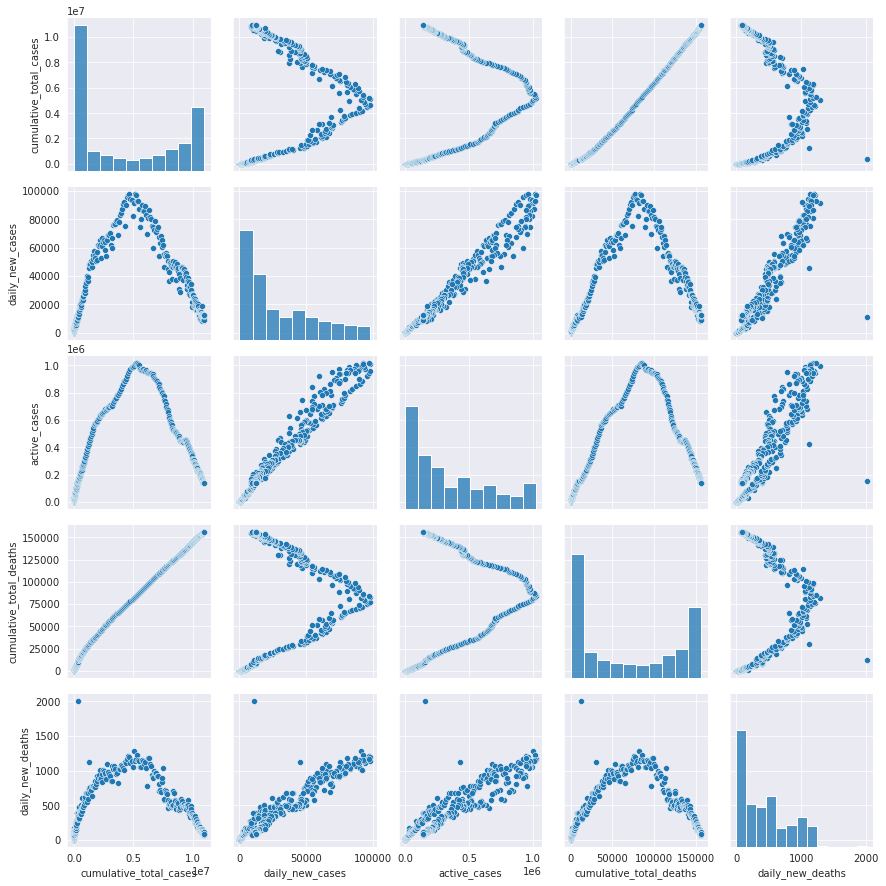

In [9]:
sns.set_style('darkgrid')
sns.pairplot(ind)

<AxesSubplot:xlabel='date', ylabel='daily_new_deaths'>

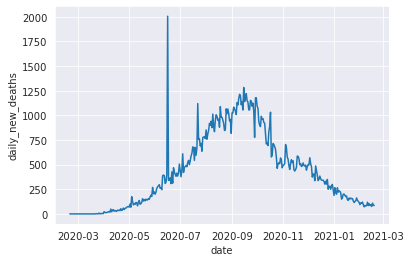

In [10]:
sns.lineplot(x='date', y='daily_new_deaths', data=ind)

In [11]:
us = df[df['country']=='USA']
us = us.fillna(value='0')
print(us)

            date country  cumulative_total_cases daily_new_cases  \
77354 2020-02-15     USA                    15.0               0   
77355 2020-02-16     USA                    15.0             0.0   
77356 2020-02-17     USA                    15.0             0.0   
77357 2020-02-18     USA                    15.0             0.0   
77358 2020-02-19     USA                    15.0             0.0   
...          ...     ...                     ...             ...   
77719 2021-02-14     USA              28264918.0         66466.0   
77720 2021-02-15     USA              28318545.0         53627.0   
77721 2021-02-16     USA              28382179.0         63634.0   
77722 2021-02-17     USA              28454600.0         72421.0   
77723 2021-02-18     USA              28523524.0         68924.0   

       active_cases  cumulative_total_deaths daily_new_deaths  
77354          12.0                      0.0                0  
77355          12.0                      0.0           

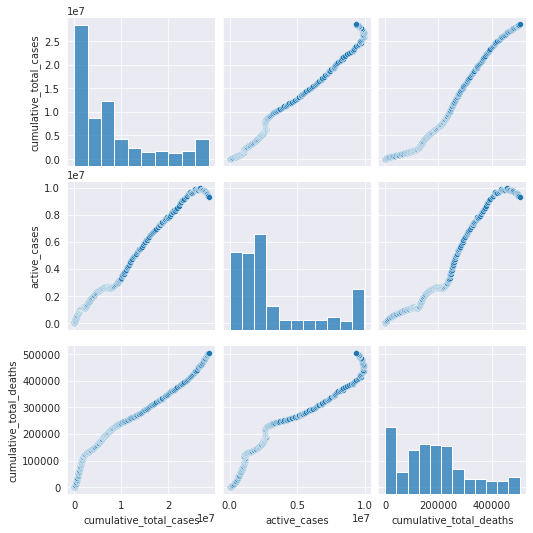

In [12]:
sns.pairplot(us)

/home/hp/miniconda3/envs/myenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily_new_deaths', ylabel='Density'>

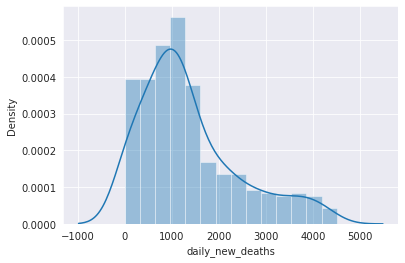

In [13]:
sns.distplot(us['daily_new_deaths'])

/home/hp/miniconda3/envs/myenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily_new_deaths', ylabel='Density'>

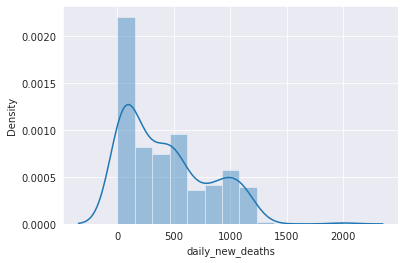

In [19]:
sns.distplot(ind['daily_new_deaths'])

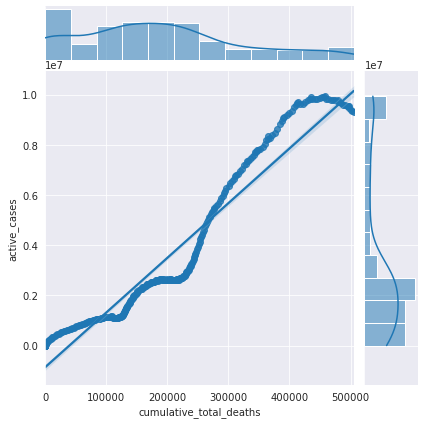

In [15]:
sns.jointplot(x='cumulative_new_deaths', y='active_cases', data=us, kind='reg')

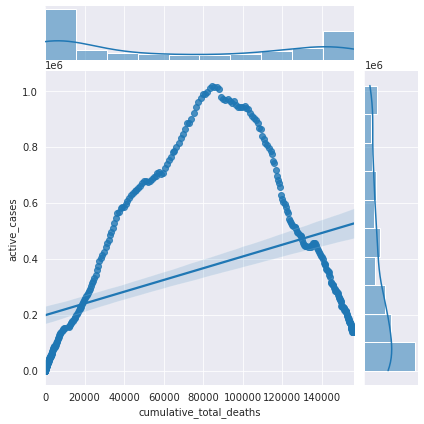

In [16]:
sns.jointplot(x='cumulative_total_deaths', y='active_cases', data=ind, kind='reg')

Text(0, 0.5, 'Daily New Deaths occuring')

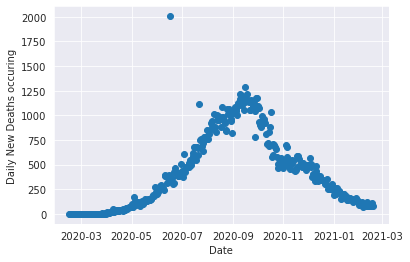

In [32]:
plt.plot(ind['date'], ind['daily_new_deaths'], 'o')
plt.xlabel('Date')
plt.ylabel('Daily New Deaths occuring')


Text(0, 0.5, 'Total deaths')

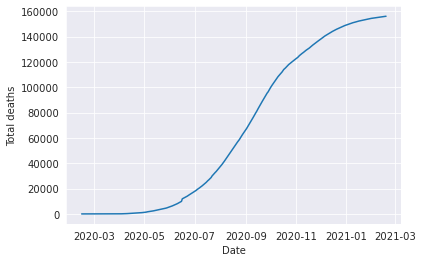

In [35]:
plt.plot(ind['date'], ind['cumulative_total_deaths'], '-')
plt.xlabel('Date')
plt.ylabel('Total deaths')

In [47]:
from sklearn.model_selection import train_test_split
X = ind[['daily_new_cases', 'active_cases']]
y=ind['cumulative_total_deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [48]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [49]:
lm.fit(X_train, y_train)

LinearRegression()

In [50]:
predictions = lm.predict(X_test)

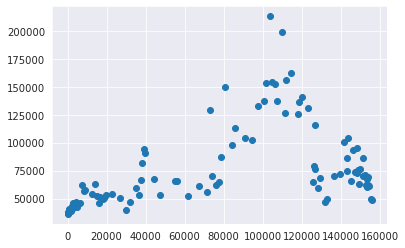

In [51]:
plt.scatter(y_test, predictions)

/home/hp/miniconda3/envs/myenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cumulative_total_deaths', ylabel='Density'>

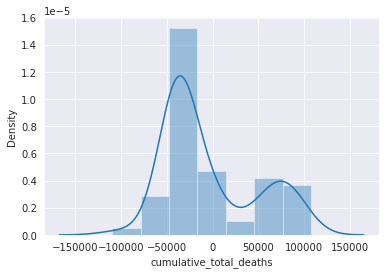

In [52]:
sns.distplot((y_test-predictions))

In [54]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)
metrics.mean_squared_error(y_test, predictions)
np.sqrt(metrics.mean_squared_error(y_test, predictions))

50350.76082767174

In [55]:
predict_all = lm.predict(X)

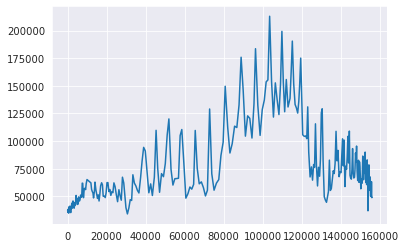

In [58]:
plt.plot(y, predict_all)

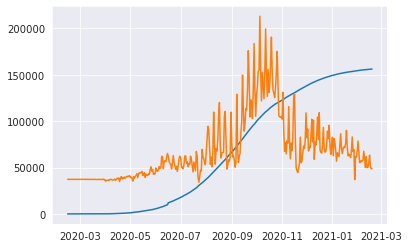

In [60]:
plt.plot(ind['date'], y)
plt.plot(ind['date'], predict_all)